In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json

In [3]:
# Import crime file as DataFrame
crime_pd = pd.read_csv("City Data/2010-2019_Crime.csv")
crime_pd.head()

,Year,Months,Area,Community,Primary Type,Crimes,Arrests,Violent,Gun_Violence,Weapon,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual,Lat,Lng
0,2010,Jan,Central,Loop,ARSON,1,0,0,0,0,0,0,0,0,0,41.881557,-87.627759
1,2010,Jan,Central,Loop,ASSAULT,29,15,2,0,2,0,0,0,0,0,41.880831,-87.629159
2,2010,Jan,Central,Loop,BATTERY,35,12,35,0,2,0,0,0,0,0,41.878982,-87.627872
3,2010,Jan,Central,Loop,BURGLARY,8,1,0,0,0,0,0,0,0,0,41.883088,-87.631038
4,2010,Jan,Central,Loop,CRIM SEXUAL ASSAULT,1,0,1,0,0,0,0,0,0,0,41.885742,-87.631499


In [4]:
# Filter on homicides and drop unneccesary rows
homicides_df = crime_pd.loc[crime_pd["Primary Type"] == "HOMICIDE"]
homicides_df = homicides_df[["Year", "Months", "Primary Type", "Community", "Crimes"]]
homicides_df

,Year,Months,Primary Type,Community,Crimes
25,2010,Jan,HOMICIDE,Near North Side,1
180,2010,Jan,HOMICIDE,Rogers Park,1
366,2010,Jan,HOMICIDE,Roseland,1
388,2010,Jan,HOMICIDE,South Chicago,2
426,2010,Jan,HOMICIDE,West Pullman,1
...,...,...,...,...,...
152807,2019,Dec,HOMICIDE,Austin,5
152828,2019,Dec,HOMICIDE,East Garfield Park,2
152846,2019,Dec,HOMICIDE,Humboldt Park,1
152865,2019,Dec,HOMICIDE,Lower West Side,1


In [5]:
print("There were 2927 homicides in Chicago in the 2010s.")

There were 2927 homicides in Chicago in the 2010s.


In [6]:
# Groupby Year
homicides_by_year = homicides_df.groupby('Year').sum()
homicides_by_year.reset_index(level=0, inplace = True)
homicides_by_year

,Year,Crimes
0,2010,438
1,2011,438
2,2012,515
3,2013,429
4,2014,426
5,2015,502
6,2016,788
7,2017,674
8,2018,592
9,2019,503


In [7]:
# Create Variables
year = homicides_by_year.iloc[:,0]
homicides = homicides_by_year.iloc[:,1]

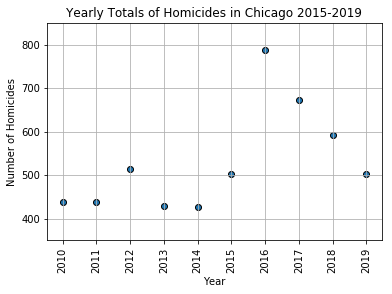

In [8]:
# Create a Scatter Plot for year vs. homicide totals
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2015-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# y range
plt.ylim(350, 850)

# Show Plot
plt.show()

In [9]:
# Perform a linear regression on year versus homicides
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(year, homicides)

In [10]:
# equation for line for predicted homicide rate
fit = slope * year + intercept

The r-squared is: 0.5495737448360712


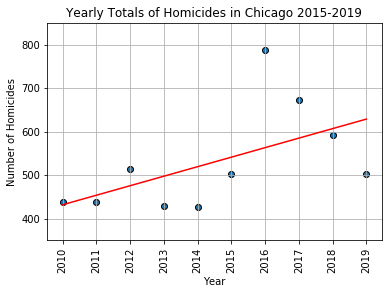

In [11]:
# Add fit line to scatter
plt.scatter(year, homicides, marker="o", edgecolors="black")

# Graph Properties
plt.title("Yearly Totals of Homicides in Chicago 2015-2019")
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.grid(True)
plt.xticks(year, rotation=90)

# add fit line
plt.plot(year,fit,"r-")

# y range
plt.ylim(350, 850)

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show Plot
plt.show()

In [12]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 21.88x +-43556.53


In [13]:
# Adding 2020 as "x":

y = 21.88 * 2020 - 43556.53
print(f"The model predicts {round(y)} homicides in Chicago in 2020.")

The model predicts 641 homicides in Chicago in 2020.


In [21]:
# Add model just on 2016-2019